# Hi! Welcome to Golf Nattapat's portfolio

I want to try to classify a business problem with this project. It is a popular project, so I selected it to start developing my classification skills. Here is the original project https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification


## About Dataset

#### Context

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

# Define the problem

The business problem is to develop a pricing classification model that can estimate the price range of the mobile phones produced by Bob's mobile company based on the phone's features such as RAM, internal memory, etc.

# Gather data

In [1]:
# Import library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Load data set
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
real_df = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')



# Explore and clean the data

In [3]:
# Check data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
# Check NA data

train.isna().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
# Check data

train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
# Check correlation

train.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [7]:
# What variable correlate to target 

round(train.corr()['price_range'].sort_values(ascending=False),2)

price_range      1.00
ram              0.92
battery_power    0.20
px_width         0.17
px_height        0.15
int_memory       0.04
sc_w             0.04
pc               0.03
three_g          0.02
sc_h             0.02
fc               0.02
talk_time        0.02
blue             0.02
wifi             0.02
dual_sim         0.02
four_g           0.01
n_cores          0.00
m_dep            0.00
clock_speed     -0.01
mobile_wt       -0.03
touch_screen    -0.03
Name: price_range, dtype: float64

#### From the correlation values, I found that `ram` had a very strong positive correlation (0.92) to `price_range`.

# Split data

In [8]:
# X = feature variables, y = a target variable
X = train.drop(['price_range'], axis=1)
y = train['price_range']

print(f"X: {X.shape}")

X: (2000, 20)


In [9]:
# split data 70% for train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_test:  {y_test.shape}")

X_train: (1400, 20)
y_train: (1400,)
X_test:  (600, 20)
y_test:  (600,)


# Model fitting

In [10]:
# DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

In [11]:
# K-Nearest Neighbors (KNN) Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

# Model evaluation

In [12]:
# DecisionTree Classifier
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred, average='micro')
dt_rec = recall_score(y_test, dt_pred, average='micro')
dt_f1 = f1_score(y_test, dt_pred, average = 'micro')


print(f"DecisionTree Accuracy score: {round(dt_acc,2)}")
print(f"DecisionTree Precision score: {round(dt_prec,2)}")
print(f"DecisionTree Recall score: {round(dt_rec,2)}")
print(f"DecisionTree F1 score: {round(dt_f1,2)}")


DecisionTree Accuracy score: 0.82
DecisionTree Precision score: 0.82
DecisionTree Recall score: 0.82
DecisionTree F1 score: 0.82


In [13]:
# K-Nearest Neighbors (KNN) Classifier
knn_pred = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, average='micro')
knn_rec = recall_score(y_test, knn_pred, average='micro')
knn_f1 = f1_score(y_test, knn_pred, average = 'micro')


print(f"K-Nearest Neighbors Accuracy score: {round(knn_acc,2)}")
print(f"K-Nearest Neighbors Precision score: {round(knn_prec,2)}")
print(f"K-Nearest Neighbors Recall score: {round(knn_rec,2)}")
print(f"K-Nearest Neighbors F1 score: {round(knn_f1,2)}")

K-Nearest Neighbors Accuracy score: 0.92
K-Nearest Neighbors Precision score: 0.92
K-Nearest Neighbors Recall score: 0.92
K-Nearest Neighbors F1 score: 0.92


# Selection



In [14]:
# Set data frame of score

score_result = pd.DataFrame({'Score': ['Accuracy','Precision','Recall','F1'],
                      'DecisionTree': [round(dt_acc,2),round(dt_prec,2),round(dt_rec,2),round(dt_f1,2)],
                     'KNN' : [round(knn_acc,2),round(knn_prec,2),round(knn_rec,2),round(knn_f1,2)]})
score_result

,Score,DecisionTree,KNN
0,Accuracy,0.82,0.92
1,Precision,0.82,0.92
2,Recall,0.82,0.92
3,F1,0.82,0.92


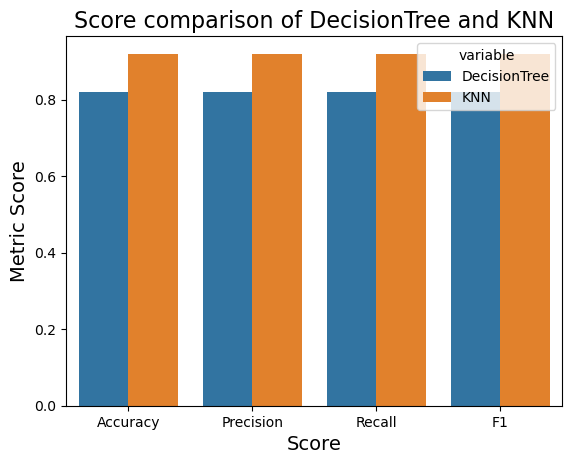

In [15]:
# Create the bar plot
ax = sns.barplot(x='Score', y='value', hue='variable', data=pd.melt(score_result, ['Score']))

# Set the title and axis labels
ax.set_title('Score comparison of DecisionTree and KNN', fontsize=16)
ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Metric Score', fontsize=14)

# Show the plot
plt.show()

We can see that the K-Nearest Neighbors Accuracy score is 0.92, while the DecisionTree Accuracy score is 0.81. Therefore, I have decided to use the **K-Nearest Neighbors model** to classify the mobile price range.

# Apply to real data

In [16]:
# Check data

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 836 to 1126
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_

In [17]:
# Check data

real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [18]:
# Delete id column
real_clean = real_df.drop('id', axis=1)
real_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [19]:
# Predict from real data

copy_real = real_clean.copy() 
real_pred = knn_model.predict(real_clean)
copy_real['price_rang_pred'] = real_pred
copy_real.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_rang_pred
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
6,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
7,833,0,2.4,1,0,0,62,0.8,111,1,...,1312,1880,1495,7,2,18,0,1,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,...,556,876,3485,11,9,10,1,1,0,3
9,1520,0,0.5,0,1,0,25,0.5,171,3,...,52,1009,651,6,0,5,1,0,1,0


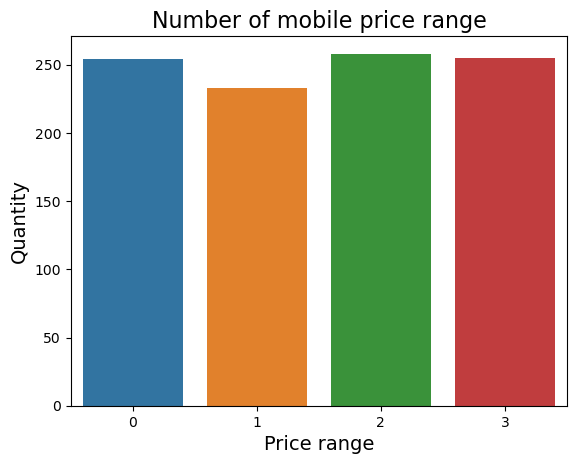

In [20]:
# Plot to see value of price range prediction
price_range_plot = sns.countplot(x='price_rang_pred', data=copy_real)

# Set the title and axis labels
price_range_plot.set_title('Number of mobile price range', fontsize=16)
price_range_plot.set_xlabel('Price range', fontsize=14)
price_range_plot.set_ylabel('Quantity', fontsize=14)

# Show the plot
plt.show()